In [46]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, multilabel_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,102,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# preprocessing

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [49]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [51]:
counter = 0
for i in df.columns:
    print(f'{df.columns[counter]}:\n{df[i].unique()}')
    counter +=1

Glucose:
[148  85 183 150 100 118 107 103 115 126  99 196 119 143 125 147  97 145
 117 109 158  88  92 122 138 102  90 111 180 133 106 171 159 146  71 105
 101 176  73 187  84  44 141 114  95 139 129  79   0  62 131 112 113  74
  83 137 110 136  80 123  81 134 142 144  93 163 151  96 155  89  76 160
 124  78 162 132 120 173 170 128 108 154  57 156 153 188 152 104  87  75
 179 130 194 181 135 184 140 177 197 164  91 165  86 193 191 161 167  77
 182 157 178 116  61 189  98 166 127  82  72 168 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure:
[ 50  66  64  40  74   0  70  96  92  80  60  72  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness:
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
Insulin:
[  0  94 168  88 543 846 175 230  83  96 235 146 1

In [52]:
# By observing we can say that there is no null value or any special character is present in columns

# check for outliers

In [53]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

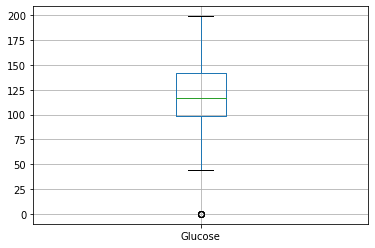

In [54]:
df[['Glucose']].boxplot() # no outliers are present

<AxesSubplot:>

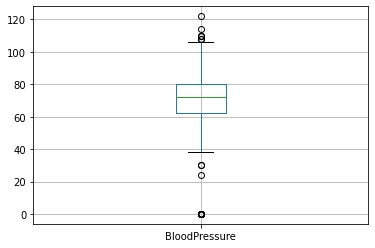

In [55]:
df[['BloodPressure']].boxplot() # outliers are present

<AxesSubplot:>

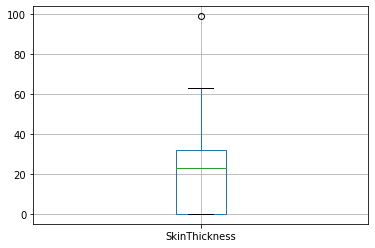

In [56]:
df[['SkinThickness']].boxplot() # outliers are present

<AxesSubplot:>

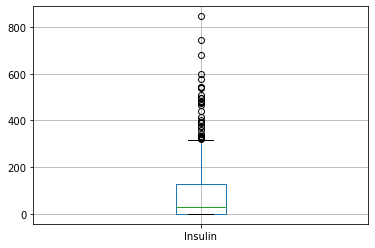

In [57]:
df[['Insulin']].boxplot() # outliers are present

<AxesSubplot:>

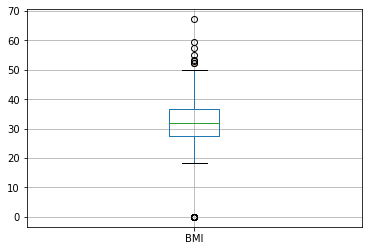

In [58]:
df[['BMI']].boxplot() # outliers are present

<AxesSubplot:>

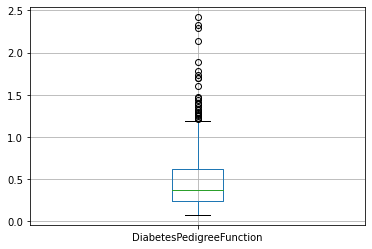

In [59]:
df[['DiabetesPedigreeFunction']].boxplot() # outliers are present

<AxesSubplot:>

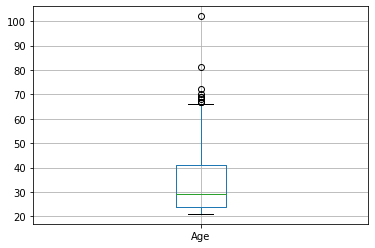

In [60]:
df[['Age']].boxplot() # outliers are present

In [61]:
# potential Outliers columns are 'BloodPressure','SkinThickness','Insulin',
# 'BMI','DiabetesPedigreeFunction'
# 'BMI' cannot be zero so replace with lower tail and upper tail


# Remove outliers

In [62]:
 df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


In [63]:
# BMI,SkinThickness,BloodPressure(unless he/she is dead) cannot be zero so replace this with median

In [64]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())

In [65]:
df['BMI'].median()

32.0

In [66]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [67]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())

In [68]:
 df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,72.358073,27.334635,79.799479,32.450911,0.471876,33.308594,0.348958
std,31.805091,12.123578,9.229014,115.244002,6.875366,0.331329,11.998145,0.476951
min,0.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,99.000000,64.000000,23.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


In [69]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.215348,0.154829,0.311509,0.219727,0.135080,0.262047,0.463051
BloodPressure,0.215348,1.000000,0.145516,-0.044029,0.280112,-0.003481,0.309597,0.162125
SkinThickness,0.154829,0.145516,1.000000,0.244250,0.546951,0.142977,0.046116,0.189065
Insulin,0.311509,-0.044029,0.244250,1.000000,0.185356,0.185071,-0.054456,0.130548
BMI,0.219727,0.280112,0.546951,0.185356,1.000000,0.153506,0.015665,0.312249
DiabetesPedigreeFunction,0.135080,-0.003481,0.142977,0.185071,0.153506,1.000000,0.039343,0.173844
Age,0.262047,0.309597,0.046116,-0.054456,0.015665,0.039343,1.000000,0.241343
Outcome,0.463051,0.162125,0.189065,0.130548,0.312249,0.173844,0.241343,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


# Train test split

In [71]:
df_lr = df.copy()
x = df_lr.drop('Outcome', axis = 1)
y = df_lr['Outcome']

In [72]:
std_scaler = StandardScaler()
std_scaler.fit(x)  # Saving mean and std

StandardScaler()

In [73]:
standard_array = std_scaler.transform(x)
x_df_std = pd.DataFrame(standard_array, columns = x.columns)
x_df_std

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-1.845383,0.831114,-0.692891,0.167240,0.468492,1.392072
1,-1.136319,-0.524780,0.180566,-0.692891,-0.851551,-0.365061,-0.192538
2,1.946957,-0.689856,-0.469981,-0.692891,-1.331838,0.604397,5.728900
3,0.908711,-0.524780,-0.469981,0.123302,-0.633239,-0.920763,-1.026543
4,0.908711,-2.670759,0.831114,0.765836,1.549885,5.484909,-0.025737
...,...,...,...,...,...,...,...
763,-0.632927,0.300596,2.240633,0.870031,0.065361,-0.908682,2.476279
764,0.027775,-0.194630,-0.036283,-0.692891,0.632973,-0.398282,-0.526140
765,-0.003687,-0.029554,-0.469981,0.279594,-0.909768,-0.685193,-0.275938
766,0.153623,-1.020006,-0.469981,-0.692891,-0.342155,-0.371101,1.141871


In [74]:
# Need to use SMOTE for balancing the data

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smt = SMOTE()
x_samples, y_samples = smt.fit_resample(x_df_std,y)
y_samples.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [77]:
x_samples

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-1.845383,0.831114,-0.692891,0.167240,0.468492,1.392072
1,-1.136319,-0.524780,0.180566,-0.692891,-0.851551,-0.365061,-0.192538
2,1.946957,-0.689856,-0.469981,-0.692891,-1.331838,0.604397,5.728900
3,0.908711,-0.524780,-0.469981,0.123302,-0.633239,-0.920763,-1.026543
4,0.908711,-2.670759,0.831114,0.765836,1.549885,5.484909,-0.025737
...,...,...,...,...,...,...,...
995,2.058037,-0.078123,-0.469981,-0.692891,-0.482523,-0.681783,0.101775
996,1.211047,1.230304,-0.469981,-0.692891,-0.269058,-0.901225,1.215666
997,1.572063,-1.088817,-0.489886,0.923741,0.004252,0.279862,0.282827
998,0.400455,0.616900,-0.388128,-0.692891,0.259257,-0.200648,0.898665


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_samples, y_samples, test_size = 0.45, random_state=11, stratify=y_samples)
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
686,0.279471,-0.689856,-0.469981,-0.692891,-1.360946,-0.476805,-0.943143
933,1.842303,-0.741986,0.302687,0.867289,0.206919,-0.384929,0.396533
223,0.657015,-1.020006,0.614265,0.956860,-0.531359,0.649699,2.309478
302,-1.388015,0.795822,1.481661,-0.328209,0.487432,-0.953984,0.141064
637,-0.853161,0.300596,-1.012104,-0.119819,-0.123843,0.534935,-0.859742
...,...,...,...,...,...,...,...
901,1.604792,-0.178571,-1.429981,0.735428,-0.422317,-0.324283,-0.050076
754,1.034559,0.465671,0.505840,-0.692891,-0.007410,-0.087210,0.975069
765,-0.003687,-0.029554,-0.469981,0.279594,-0.909768,-0.685193,-0.275938
404,1.475027,-0.689856,-0.469981,-0.692891,0.065361,-1.017406,0.641467


In [79]:
y_test.value_counts()

0    225
1    225
Name: Outcome, dtype: int64

# Model training

In [80]:
log_reg = LogisticRegression(random_state=10)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=10)

# Evaluation

In [81]:
## Testing daat evaluation
y_pred_test = log_reg.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix : \n', cnf_matrix)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print('Multilabel Confusion matrix : \n', multilabel_cnf_matrix)

acc_score_Logistic_Test = accuracy_score(y_test, y_pred_test)
print('Accuracy score : \n', acc_score_Logistic_Test)

class_report = classification_report(y_test, y_pred_test)
print('Classification report : \n', class_report)


Confusion matrix : 
 [[174  51]
 [ 66 159]]
Multilabel Confusion matrix : 
 [[[159  66]
  [ 51 174]]

 [[174  51]
  [ 66 159]]]
Accuracy score : 
 0.74
Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.77      0.75       225
           1       0.76      0.71      0.73       225

    accuracy                           0.74       450
   macro avg       0.74      0.74      0.74       450
weighted avg       0.74      0.74      0.74       450



In [82]:
# Training Data Evalutaion

y_pred_train = log_reg.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusuion matrix :\n', cnf_matrix)

acc_score__Logistic_Train = accuracy_score(y_train,y_pred_train)
print('Accuracy score :\n', acc_score__Logistic_Train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[216  59]
 [ 71 204]]
Accuracy score :
 0.7636363636363637
Classification report :
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       275
           1       0.78      0.74      0.76       275

    accuracy                           0.76       550
   macro avg       0.76      0.76      0.76       550
weighted avg       0.76      0.76      0.76       550



# BY KNN

# Model training

In [83]:
knn_clf = KNeighborsClassifier(n_neighbors=5)  
knn_clf.fit(x_train,y_train)  # model saves training data

KNeighborsClassifier()

In [84]:
# Testing Data Evalutaion

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusuion matrix :\n', cnf_matrix)

acc_score_KNN_Test = accuracy_score(y_test,y_pred)
print('Accuracy score :\n', acc_score_KNN_Test)

clf_report = classification_report(y_test,y_pred)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[162  63]
 [ 33 192]]
Accuracy score :
 0.7866666666666666
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       225
           1       0.75      0.85      0.80       225

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450



In [85]:
# Training Data Evalutaion

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusuion matrix :\n', cnf_matrix)

acc_score_KNN_Train = accuracy_score(y_train,y_pred_train)
print('Accuracy score :\n', acc_score_KNN_Train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[205  70]
 [ 33 242]]
Accuracy score :
 0.8127272727272727
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       275
           1       0.78      0.88      0.82       275

    accuracy                           0.81       550
   macro avg       0.82      0.81      0.81       550
weighted avg       0.82      0.81      0.81       550



# standardisation

In [86]:
std_scaler = StandardScaler()
std_scaler.fit(x)  # Saving mean and std

StandardScaler()

In [87]:
standard_array = std_scaler.transform(x)
x_df_std = pd.DataFrame(standard_array, columns = x.columns)
x_df_std

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-1.845383,0.831114,-0.692891,0.167240,0.468492,1.392072
1,-1.136319,-0.524780,0.180566,-0.692891,-0.851551,-0.365061,-0.192538
2,1.946957,-0.689856,-0.469981,-0.692891,-1.331838,0.604397,5.728900
3,0.908711,-0.524780,-0.469981,0.123302,-0.633239,-0.920763,-1.026543
4,0.908711,-2.670759,0.831114,0.765836,1.549885,5.484909,-0.025737
...,...,...,...,...,...,...,...
763,-0.632927,0.300596,2.240633,0.870031,0.065361,-0.908682,2.476279
764,0.027775,-0.194630,-0.036283,-0.692891,0.632973,-0.398282,-0.526140
765,-0.003687,-0.029554,-0.469981,0.279594,-0.909768,-0.685193,-0.275938
766,0.153623,-1.020006,-0.469981,-0.692891,-0.342155,-0.371101,1.141871


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_samples, y_samples, test_size=0.25, random_state=23, stratify =y_samples)
x_test.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
808,-0.084551,1.014106,2.178806,1.294846,2.003834,0.165628,-0.192538
249,-0.318307,1.125973,-0.903679,-0.692891,-0.342155,-0.993245,-0.859742
848,0.267969,-0.310834,2.335300,0.412669,0.927175,-0.112574,0.818850
515,1.317717,-0.194630,-1.012104,0.218813,-0.123843,-0.615731,-0.442740
617,-1.671173,-0.854931,-1.554226,-0.562647,-1.797571,-0.648952,-0.859742


In [89]:
knn_clf_norm = KNeighborsClassifier(n_neighbors=5)
knn_clf_norm.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
# Testing Data Evalutaion

y_pred = knn_clf_norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusuion matrix :\n', cnf_matrix)

acc_score_KNN_Test = accuracy_score(y_test,y_pred)
print('Accuracy score :\n', acc_score_KNN_Test)

clf_report = classification_report(y_test,y_pred)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[ 86  39]
 [ 16 109]]
Accuracy score :
 0.78
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       125
           1       0.74      0.87      0.80       125

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250



In [91]:
# Training Data Evalutaion

y_pred_train = knn_clf_norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusuion matrix :\n', cnf_matrix)

acc_score_KNN_Train = accuracy_score(y_train,y_pred_train)
print('Accuracy score :\n', acc_score_KNN_Train)

clf_report = classification_report(y_train,y_pred_train)
print('Classification report :\n', clf_report)

Confusuion matrix :
 [[292  83]
 [ 35 340]]
Accuracy score :
 0.8426666666666667
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       375
           1       0.80      0.91      0.85       375

    accuracy                           0.84       750
   macro avg       0.85      0.84      0.84       750
weighted avg       0.85      0.84      0.84       750



# Decision Tree classification

In [92]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

# Model Evaluation

In [93]:
# Testing Accuracy

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cnf_matrix)
print("********************************************")

acc_score_DT_Test = accuracy_score(y_test, y_pred)
print("Accuracy Score : \n", acc_score_DT_Test)
print("********************************************")

clf_report = classification_report(y_test, y_pred)
print("Classification report : \n", clf_report)
print("********************************************")

Confusion Matrix : 
 [[99 26]
 [36 89]]
********************************************
Accuracy Score : 
 0.752
********************************************
Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       125
           1       0.77      0.71      0.74       125

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

********************************************


In [94]:
# Training Accuracy

y_pred = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix : \n", cnf_matrix)
print("********************************************")

acc_score_DT_Train = accuracy_score(y_train, y_pred)
print("Accuracy Score : \n", acc_score_DT_Train)
print("********************************************")

clf_report = classification_report(y_train, y_pred)
print("Classification report : \n", clf_report)
print("********************************************")

Confusion Matrix : 
 [[375   0]
 [  0 375]]
********************************************
Accuracy Score : 
 1.0
********************************************
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

********************************************


# Plot DT

In [95]:
plt.figure(figsize = (200,160))
plot_tree(dt_clf, feature_names=x.columns, class_names = ["0", "1"], filled = True)
plt.savefig('DecisionTree_diabetes.png')

# Hyperparameter Testing

In [96]:
dt_clf = DecisionTreeClassifier()
hyperparameters = {"criterion" : ["gini", "entropy"],
                  "max_depth" : np.arange(3,8),
                  "min_samples_split" : np.arange(2,20),
                  "min_samples_leaf" : np.arange(2,10)}

In [97]:
rscv_dt_model = RandomizedSearchCV(dt_clf, hyperparameters, cv = 5)
rscv_dt_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [98]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=13)

In [99]:
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=4, min_samples_leaf=6, min_samples_split=5)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       min_samples_split=5)

In [100]:
# Testing Accuracy

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cnf_matrix)
print("********************************************")

acc_score_DT_Test = accuracy_score(y_test, y_pred)
print("Accuracy Score : \n", acc_score_DT_Test)
print("********************************************")

clf_report = classification_report(y_test, y_pred)
print("Classification report : \n", clf_report)
print("********************************************")

Confusion Matrix : 
 [[ 91  34]
 [ 15 110]]
********************************************
Accuracy Score : 
 0.804
********************************************
Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       125
           1       0.76      0.88      0.82       125

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250

********************************************


In [101]:
# Training Accuracy

y_pred = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix : \n", cnf_matrix)
print("********************************************")

acc_score_DT_Train = accuracy_score(y_train, y_pred)
print("Accuracy Score : \n", acc_score_DT_Train)
print("********************************************")

clf_report = classification_report(y_train, y_pred)
print("Classification report : \n", clf_report)
print("********************************************")

Confusion Matrix : 
 [[274 101]
 [ 47 328]]
********************************************
Accuracy Score : 
 0.8026666666666666
********************************************
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.73      0.79       375
           1       0.76      0.87      0.82       375

    accuracy                           0.80       750
   macro avg       0.81      0.80      0.80       750
weighted avg       0.81      0.80      0.80       750

********************************************


# Random Forest

In [102]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [103]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n", cnf_matrix)

acc_score_RF_Test = accuracy_score(y_test,y_pred)
print("Accuracy score \n", acc_score_RF_Test)

clf_report = classification_report(y_test,y_pred)
print("Classification report \n", clf_report)

Confusion Matrix 
 [[ 98  27]
 [ 10 115]]
Accuracy score 
 0.852
Classification report 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       125
           1       0.81      0.92      0.86       125

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250



In [104]:
# Training Data Evaluation
y_pred = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion Matrix \n", cnf_matrix)

acc_score_RF_Train = accuracy_score(y_train,y_pred)
print("Accuracy score \n", acc_score_RF_Train)

clf_report = classification_report(y_train,y_pred)
print("Classification report \n", clf_report)

Confusion Matrix 
 [[375   0]
 [  0 375]]
Accuracy score 
 1.0
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



# Hyperparameter Tuning

In [105]:
rf_model = RandomForestClassifier(random_state=10)

hyp = {"n_estimators" : np.arange(10,200),
    "criterion":['gini','entropy'],
    "max_depth":np.arange(5,15),
    "min_samples_split":np.arange(5,20),
    "min_samples_leaf":np.arange(5,15),
    "max_features":['auto']}

In [106]:
rscv_rf_clf =RandomizedSearchCV(rf_model, hyp, cv = 5)
rscv_rf_clf.fit(x_train,y_train)
rscv_rf_clf.best_estimator_

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

RandomForestClassifier(max_depth=14, max_features='auto', min_samples_leaf=13,
                       min_samples_split=18, n_estimators=11, random_state=10)

In [107]:
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=17, n_estimators=11, random_state=10)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=17, n_estimators=11, random_state=10)

In [108]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix", cnf_matrix)

acc_score_RF_Test = accuracy_score(y_test,y_pred)
print("Accuracy score", acc_score_RF_Test)

clf_report = classification_report(y_test,y_pred)
print("Classification report", clf_report)

Confusion Matrix [[ 81  44]
 [ 16 109]]
Accuracy score 0.76
Classification report               precision    recall  f1-score   support

           0       0.84      0.65      0.73       125
           1       0.71      0.87      0.78       125

    accuracy                           0.76       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.77      0.76      0.76       250



In [109]:
# Training Data Evaluation
y_pred = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion Matrix", cnf_matrix)

acc_score_RF_Train = accuracy_score(y_train,y_pred)
print("Accuracy score", acc_score_RF_Train)

clf_report = classification_report(y_train,y_pred)
print("Classification report", clf_report)

Confusion Matrix [[274 101]
 [ 42 333]]
Accuracy score 0.8093333333333333
Classification report               precision    recall  f1-score   support

           0       0.87      0.73      0.79       375
           1       0.77      0.89      0.82       375

    accuracy                           0.81       750
   macro avg       0.82      0.81      0.81       750
weighted avg       0.82      0.81      0.81       750



In [110]:
df_diabetic = pd.DataFrame(columns=['train_acc','Test_acc'],index=['Logistic_diabetic','KNN_diabetic','DT_diabetic','RF_diabetic'])
df_diabetic

,train_acc,Test_acc
Logistic_diabetic,NaN,NaN
KNN_diabetic,NaN,NaN
DT_diabetic,NaN,NaN
RF_diabetic,NaN,NaN


In [111]:
df_diabetic['train_acc'] = [acc_score__Logistic_Train,acc_score_KNN_Train,acc_score_DT_Train,acc_score_RF_Train]
df_diabetic['Test_acc'] = [acc_score_Logistic_Test,acc_score_KNN_Test,acc_score_DT_Test,acc_score_RF_Test]

In [112]:
df_diabetic.to_csv('df_diabetic.csv')
df_diabetic

,train_acc,Test_acc
Logistic_diabetic,0.763636,0.740
KNN_diabetic,0.842667,0.780
DT_diabetic,0.802667,0.804
RF_diabetic,0.809333,0.760
